In [13]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# loading the dataset
df = pd.read_csv("C:/Users/USER/Desktop/Abbie's World/My project/1_Hotel Booking Demand Project/1_with_Excel/hotel_booking_cleaned.csv")

In [15]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   cancelled_status                87396 non-null  object 
 3   lead_time                       87396 non-null  int64  
 4   arrival_date_year               87396 non-null  int64  
 5   arrival_date_month              87396 non-null  object 
 6   arrival_date_week_number        87396 non-null  int64  
 7   arrival_date_day_of_month       87396 non-null  int64  
 8   stays_in_weekend_nights         87396 non-null  int64  
 9   stays_in_week_nights            87396 non-null  int64  
 10  adults                          87396 non-null  int64  
 11  children                        87396 non-null  int64  
 12  babies                          

In [16]:
df.sample(5)

,hotel,is_canceled,cancelled_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,days_waiting_grouping,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
57730,City Hotel,0,Not Cancelled,1,2016,February,7,13,1,1,...,9,0,0,0 days,Transient,91.0,0,0,Check-Out,15/02/2016
38244,City Hotel,1,Cancelled,39,2016,March,11,6,2,3,...,9,0,0,0 days,Transient,116.1,0,1,Canceled,29/01/2016
18648,Resort Hotel,0,Not Cancelled,23,2016,April,16,15,0,2,...,240,0,0,0 days,Transient,75.0,0,1,Check-Out,17/04/2016
12068,Resort Hotel,1,Cancelled,239,2015,August,35,29,4,10,...,143,0,0,0 days,Contract,110.5,0,2,Canceled,30/07/2015
29992,Resort Hotel,0,Not Cancelled,22,2017,May,18,1,1,1,...,240,0,0,0 days,Transient,111.0,1,1,Check-Out,03/05/2017


In [17]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [18]:
# data cleaning and preprocessing
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

# Creating a new 'arrival_date' column
df['arrival_date'] = pd.to_datetime(
    df[['arrival_date_year',
        'arrival_date_month',
        'arrival_date_day_of_month']]
        .astype(str).agg('-'.join, axis=1))

In [19]:
# data overview
pd.set_option('display.max_columns', None)

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,total_guest,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396,87396
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,2.025253,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,2016-08-31 03:44:08.963339520,2016-09-15 00:20:26.857064448
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,2015-07-01 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00,2016-04-01 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00,2016-09-20 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00,2017-04-01 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,55.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,2017-08-31 00:00:00
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.794319,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,NaN,NaN


In [20]:
# Removing entries with negative adr
df_filtered = df[df['adr'] >= 0].copy()

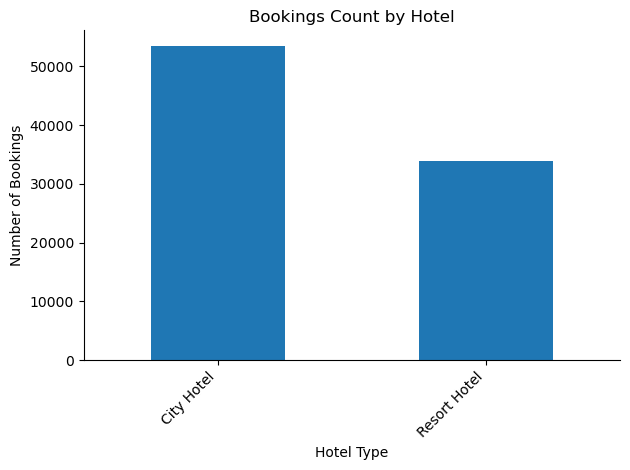

In [21]:
booking_count_by_hotel = df_filtered['hotel'].value_counts()

booking_count_by_hotel.plot(kind='bar')
sns.despine()
plt.title('Bookings Count by Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

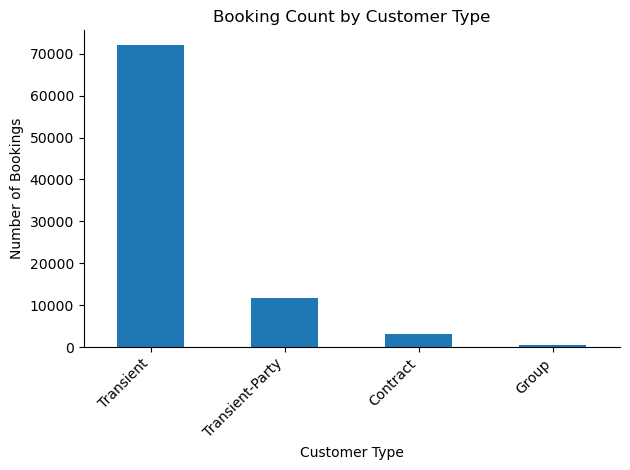

In [22]:
booking_count = df_filtered['customer_type'].value_counts()

booking_count.plot(kind='bar')
sns.despine()
plt.title('Booking Count by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

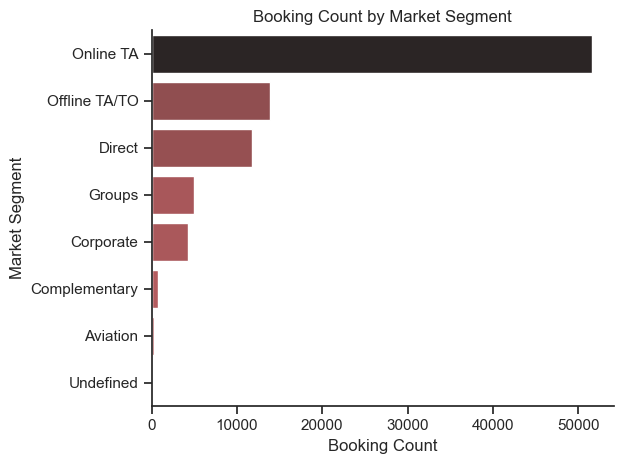

In [23]:
df_plot = df_filtered['market_segment'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data= df_plot,x='count', y='market_segment', hue='count', palette='dark:r_r', legend=False)
sns.despine()
plt.title('Booking Count by Market Segment')
plt.xlabel('Booking Count')
plt.ylabel('Market Segment')

plt.tight_layout()
plt.show()

### Customer Behavior Chart

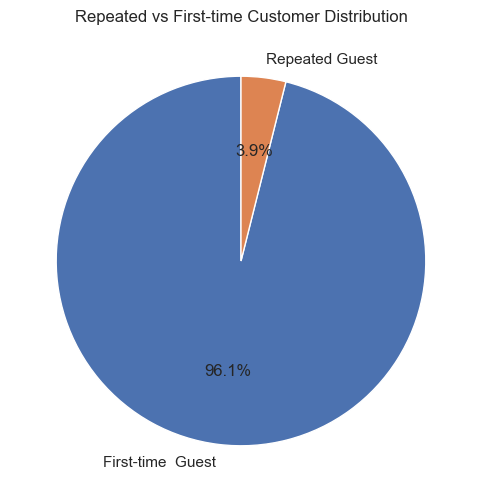

In [24]:
counts_plot = df_filtered['repeated_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts_plot, 
    labels=counts_plot.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Repeated vs First-time Customer Distribution')
plt.show()


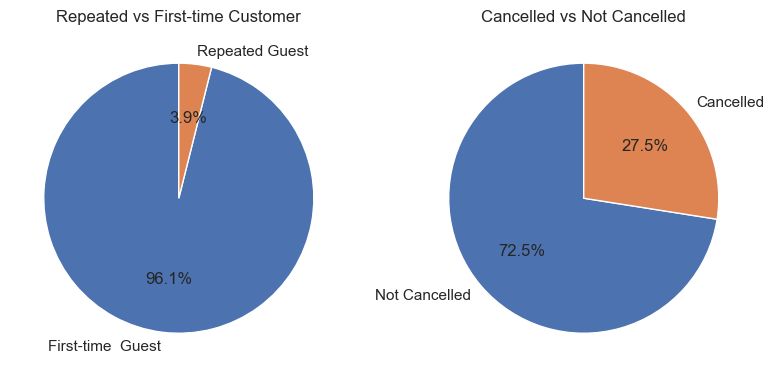

In [25]:
counts_repeated = df_filtered['repeated_status'].value_counts()
counts_cancelled = df_filtered['cancelled_status'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(8,4))

# Repeated_status
axes[0].pie(
    counts_repeated, 
    labels=counts_repeated.index, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[0].set_title('Repeated vs First-time Customer')

# Cancelled_status
axes[1].pie(
    counts_cancelled, 
    labels=counts_cancelled.index, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[1].set_title('Cancelled vs Not Cancelled')


plt.tight_layout()
plt.show()
